In [1]:
# The %... is an iPython thing, and is not part of the Python language.
# In this case we're just telling the plotting library to draw things on
# the notebook, instead of on a separate window.
%matplotlib inline
# See all the "as ..." contructs? They're just aliasing the package names.
# That way we can call methods like plt.plot() instead of matplotlib.pyplot.plot().
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("poster")


In [2]:
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

In [3]:
DATABASE = {
    'drivername': 'postgres',
    'host': 'localhost',
    'port': '5432',
    'username': 'twocucao',
    'password': '',
    'database': 'shanbaydb'
}

In [4]:
engine = create_engine(URL(**DATABASE))

In [5]:
with engine.connect() as conn, conn.begin():
    data = pd.read_sql_table('shanbay_user', conn)

In [6]:
data

,user_id,username,nickname,growth_stat,words_count,words_learned_count,words_learning_count,words_new_count,checkin_days_count
0,142,waini12,waini12,61,0,0,0,0,8
1,421,子蓝,子蓝,75,0,0,0,0,0
2,426,郁叶,郁叶,387,0,0,0,0,49
3,2,cheka,Cheka,7596,6438,5967,121,350,823
4,11,xconline,xconline,533,0,0,95,6,35
5,17,dearelephant,dearelephant,3052,0,0,0,0,400
6,14,xiawinter,why,11822,12595,12368,195,32,1230
7,312,sally1209,sally_1209,985,2570,2187,383,0,122
8,314,wangqiang,wangqiang,501,0,0,0,0,62
9,348,river_1106,river_1106,136,0,0,0,0,17



> 最高

 - 成长值
 - 打卡天数
 - 单词数量
 
 
> 平均值

 - 成长值
 - 打卡天数
 - 单词数量

> 分布

 - 成长值
 - 打开天数(1/5/10/50/100/500/1000/1000+)
 - 单词数量(1/5/10/50/100/500/1000/1000+)

> 联系

 - 对于打卡100天以上的人,打卡天数和单词数量

> 组成
 
 - 打卡百分比

In [7]:
# row number
data.index.size
#最高
#data.max()这个是默认找出每行的最大值
#data.max(axis=1)
data[data.growth_stat == data.growth_stat.max()]

,user_id,username,nickname,growth_stat,words_count,words_learned_count,words_learning_count,words_new_count,checkin_days_count
8863,252751,Lerystal,-靛蓝小孩-,28767,13357,9405,648,3303,1735


In [8]:
data[data.words_count == data.words_count.max()]

,user_id,username,nickname,growth_stat,words_count,words_learned_count,words_learning_count,words_new_count,checkin_days_count
65375,663919,chenmaoboss,chenmaoboss,10695,38313,37224,1010,56,1353


In [9]:
data[data.checkin_days_count == data.checkin_days_count.max()]

,user_id,username,nickname,growth_stat,words_count,words_learned_count,words_learning_count,words_new_count,checkin_days_count
7360,228171,chainyu,Chain,14688,14348,14333,15,0,1830


In [10]:
# 平均每人多少成长值
data.growth_stat.mean()

121.79073578135436

In [11]:
# 平均每人学了多少单词
data.words_count.mean()

78.92198897342884

In [12]:
# 每个人打卡次数
data.checkin_days_count.mean()

14.180090294783987

In [13]:
# 多少人过了成长值平均值呢?
data[data.growth_stat > data.growth_stat.mean()].index.size

71342

In [14]:
# 多少人过了单词平均值呢?
data[data.words_count > data.words_count.mean()].index.size

13351

In [15]:
# 多少人过了打卡平均值呢?
data[data.checkin_days_count > data.checkin_days_count.mean()].index.size

69782

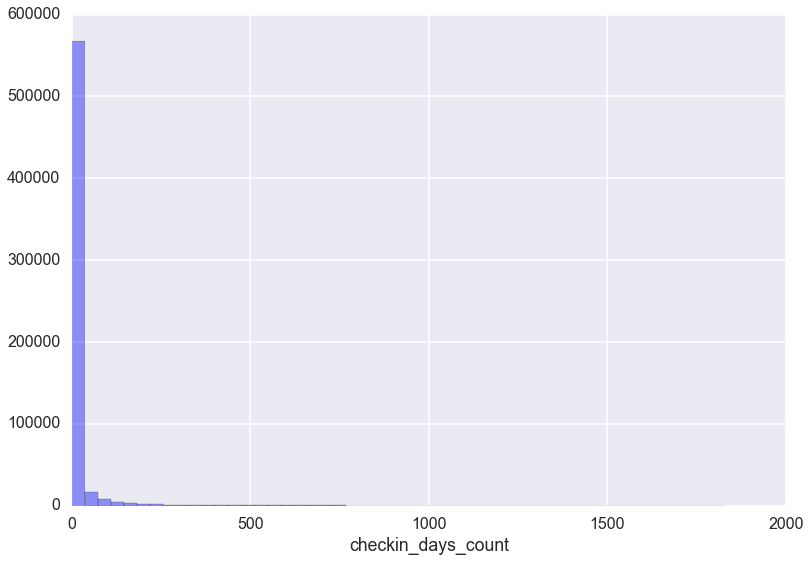

In [45]:
sns.distplot(data.checkin_days_count, kde=False, color="b")

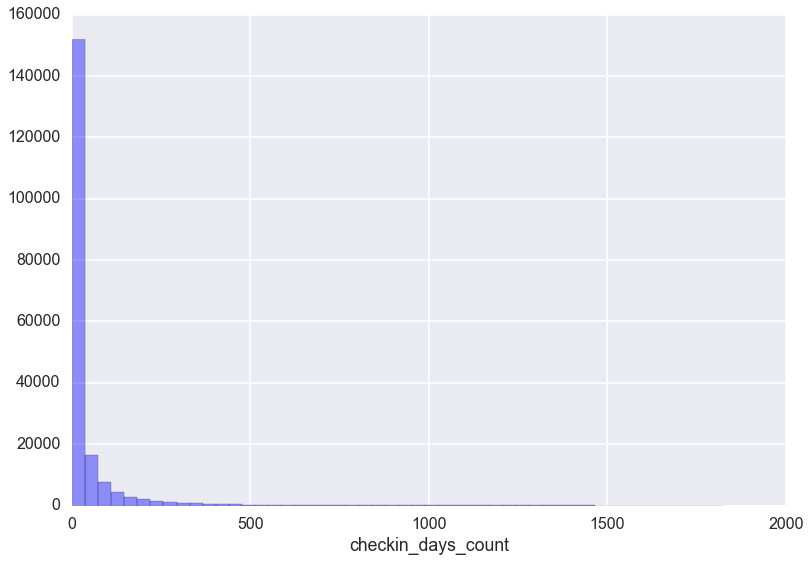

In [44]:
# 打卡次数的分布

non_zero_data = data[data.checkin_days_count > 0]
sns.distplot(non_zero_data.checkin_days_count, kde=False, color="b")

# 哎呦我擦,这尼玛,太....

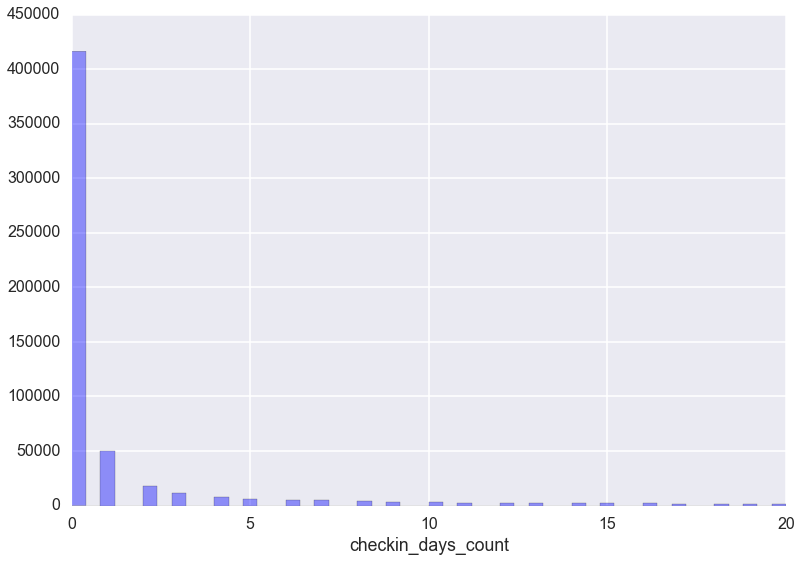

In [17]:
from0to20 = data[data.checkin_days_count <= 20]
sns.distplot(from0to20.checkin_days_count, kde=False, color="b")

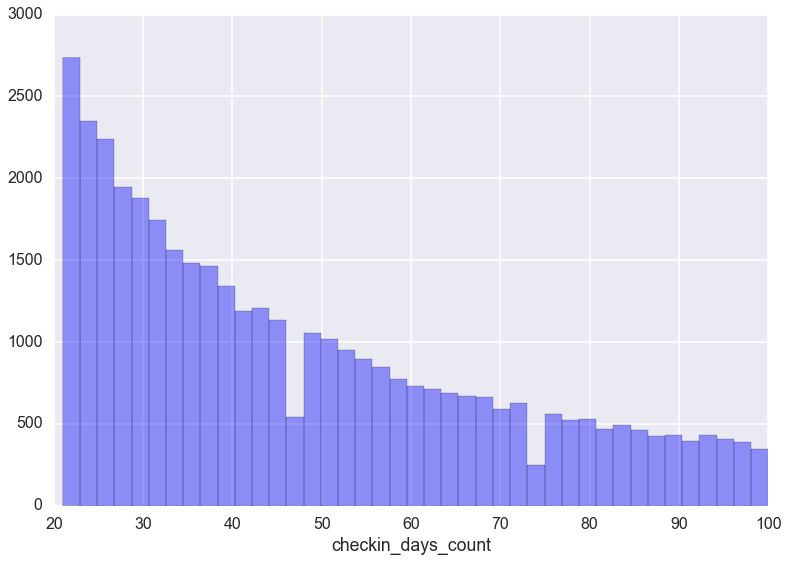

In [18]:
from20to100 = data[(data.checkin_days_count > 20) & (data.checkin_days_count <= 100) ]
sns.distplot(from20to100.checkin_days_count, kde=False, color="b")

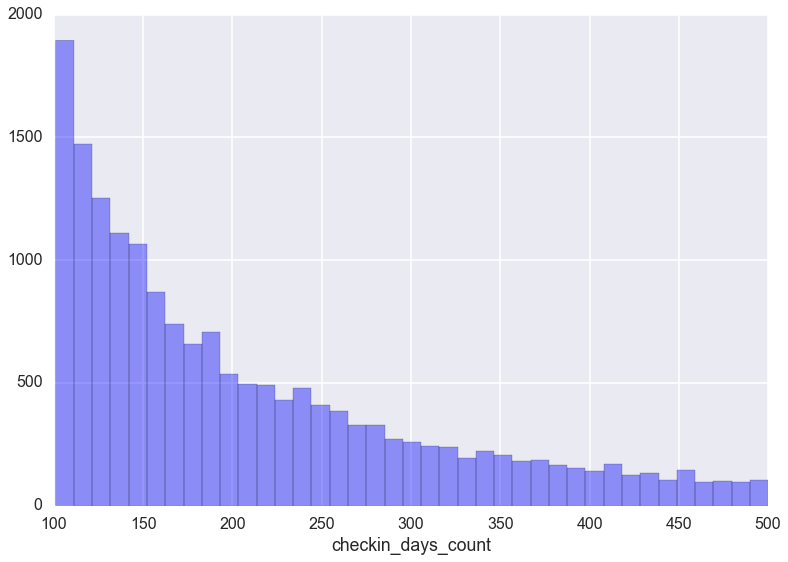

In [19]:
from100to500 = data[(data.checkin_days_count > 100) & (data.checkin_days_count <= 500) ]
sns.distplot(from100to500.checkin_days_count, kde=False, color="b")

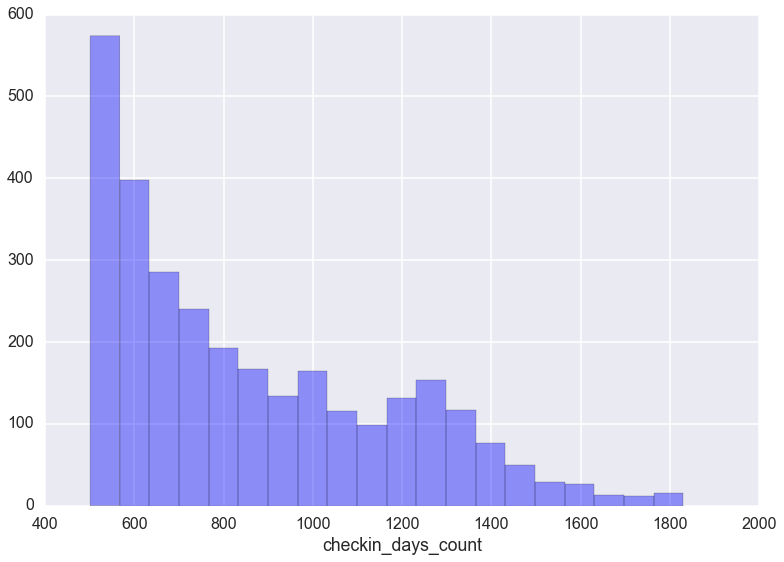

In [20]:
from500to2000 = data[(data.checkin_days_count > 500) & (data.checkin_days_count <= 2000) ]
sns.distplot(from500to2000.checkin_days_count, kde=False, color="b")

其他成长值和单词数量大抵也是如此分布.

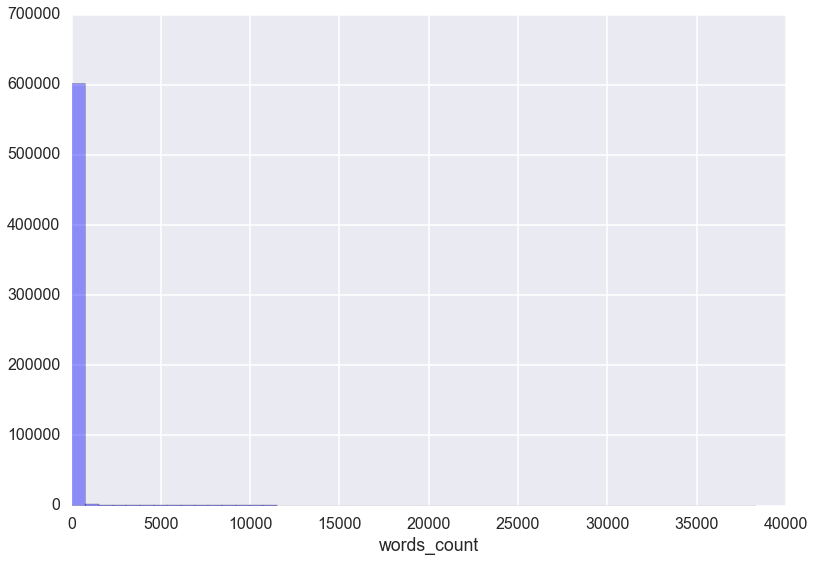

In [21]:
sns.distplot(data.words_count, kde=False, color="b")

In [59]:
new_data = data[["checkin_days_count","words_count"]].drop_duplicates()
top_data = new_data[new_data.checkin_days_count > 200]

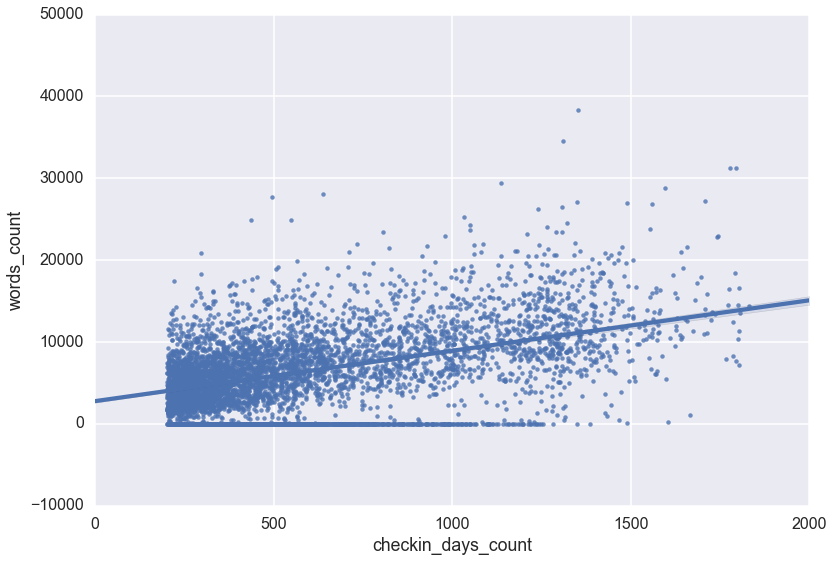

In [62]:
sns.regplot(x="checkin_days_count",y="words_count",data = top_data)

In [86]:
def ratio_die_on_day(n):
    size = data[data.checkin_days_count <= n].index.size
    return ( size / 610888,size)

In [87]:
ratio_die_on_day(0)

(0.6815504642422179, 416351)

In [88]:
ratio_die_on_day(1)

(0.7640696821675986, 466761)

In [89]:
ratio_die_on_day(2)

(0.7931650318880057, 484535)

In [90]:
ratio_die_on_day(5)

(0.8352267518759576, 510230)

In [91]:
ratio_die_on_day(10)

(0.8695849320988462, 531219)

In [92]:
ratio_die_on_day(20)

(0.9028774505310302, 551557)

In [93]:
ratio_die_on_day(50)

(0.942848770969474, 575975)

In [94]:
ratio_die_on_day(100)

(0.9669530257592226, 590700)

In [95]:
ratio_die_on_day(200)

(0.9836091067429709, 600875)

In [100]:
ratio_die_on_day(263)

(0.9881827765482379, 603669)

In [97]:
ratio_die_on_day(500)

(0.9950989379395241, 607894)

In [98]:
ratio_die_on_day(1000)

(0.9985070913162478, 609976)

In [99]:
ratio_die_on_day(1500)

(0.9998428517174998, 610792)